In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ILP Data Analysis").getOrCreate()

In [0]:
#to take care all data type
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import *

In [0]:
ball_by_ball_df = spark.read.format("csv").option("header","true").option("inferSchema","true").load("s3://iplbucket1/Ball_By_Ball.csv")

In [0]:
#but it is considering boolean as int
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Fielder_match_SK|Fi

In [0]:
#using this below technique, we can handle all type of data; this can be easily generated using chatgpt
ball_by_ball_schema = StructType([
    StructField("match_id",IntegerType(),True),
    StructField("Over_id",IntegerType(),True),
    StructField("Ball_id",IntegerType(),True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),  # Note potential typo in "obstructingfeild"; should likely be "obstructing_field"
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://iplbucket1/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # Assuming season_year is an integer representing the year
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://iplbucket1/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
player_df = spark.read.schema(player_schema).format("csv").option("header","true").load("s3://iplbucket1/Player.csv")

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),  # Specify precision and scale if needed, e.g., DecimalType(10,2)
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # Assuming season_year is an integer representing the year
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

In [0]:
player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://iplbucket1/Player_match.csv")

In [0]:
team_schema = schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [0]:
team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://iplbucket1/Team.csv")

In [0]:
#Transformation: remove null values, operation on colum, filter etc. depent on requirement

#filter to include only va;id delivaries(remove wides and no balls)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0))

In [0]:
#aggregation: Calculate the total and avg runs scored in each match and inning
total_and_avg_runs = ball_by_ball_df.groupby("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("avg_runs")
)

In [0]:
#Window Function: Calculate running total of runs in each match for each over
from pyspark.sql.window import Window

windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")
ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
#conditional column:Flag for high impact balls(either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored")+col("extra_runs") >6) | (col("bowler_wicket") == True),True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|Over_id|Ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
#extracting year,month and day from the match date for detailed time-based analysis
match_df = match_df.withColumn("year",year("match_date"))
match_df = match_df.withColumn("month",year("match_date"))
match_df = match_df.withColumn("day",year("match_date"))

#high argin win:categorize with 'high','medium','low'
match_df = match_df.withColumn(
    "win_margin_category",
    when(col("win_margin")>100,"High")
    .when((col("win_margin")>30) & (col("win_margin")<100),"Medium")
    .otherwise("Low")
)

match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challengers...|Kolkata Knight Ri...|    fie

In [0]:
match_df = match_df.withColumn(
    "toss_match_winer",
    when(col("toss_winner") == col("match_winner"),"Yes").otherwise("No")
)
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winer|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       Indi

In [0]:
#Normalize and clear player names
player_df = player_df.withColumn("player_name",lower(regexp_replace("player_name","[^a-zA-Z0-9]","")))

#handling missing values 
player_df = player_df.na.fill({"batting_hand":"unknown","bowling_skill":"unknown"})

#categorize players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when(col("batting_hand").contains("Left"),"Left-handed").otherwise("Right handed")
)

player_df.show(5)

+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|   player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
|        0|        1|     scganguly|null| Left-hand bat|  Right-arm medium|       India|  Left-handed|
|        1|        2|    bbmccullum|null|Right-hand bat|  Right-arm medium| New Zealand| Right handed|
|        2|        3|     rtponting|null|Right-hand bat|  Right-arm medium|   Australia| Right handed|
|        3|        4|      djhussey|null|Right-hand bat|Right-arm offbreak|   Australia| Right handed|
|        4|        5|mohammadhafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan| Right handed|
+---------+---------+--------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows



In [0]:
#add a 'veteran_status' column based on the player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match")>=35,"Veteran").otherwise("Non Veteran")
)

#Dynamic column to calculate yearns since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date())-col("season_year"))
)

player_match_df.show(5)


+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----

In [0]:
#convert from dataframe to database table to perform SQL queries
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
top_scoring_batsman_per_seanon = spark.sql("""
select p.player_name,m.season_year,sum(b.runs_scored) as total_runs
from ball_by_ball as b
join match as m on b.match_id = m.match_id
join player_match as pm on m.match_id = pm.match_id and b.striker = pm.player_id
join player as p on p.player_id = pm.player_id
group by p.player_name,m.season_year
order by m.season_year, total_runs desc
""")

In [0]:
top_scoring_batsman_per_seanon.show(10)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|     semarsh|       2008|       614|
|    ggambhir|       2008|       532|
|stjayasuriya|       2008|       508|
|    srwatson|       2008|       463|
|     gcsmith|       2008|       437|
| acgilchrist|       2008|       431|
|    ykpathan|       2008|       430|
|     skraina|       2008|       420|
|     msdhoni|       2008|       414|
|     vsehwag|       2008|       399|
+------------+-----------+----------+
only showing top 10 rows



In [0]:
economical_bowlers_powerplay = spark.sql("""
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball, 
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) >= 1
ORDER BY avg_runs_per_ball, total_wickets DESC
""")
economical_bowlers_powerplay.show()

+-------------+------------------+-------------+
|  player_name| avg_runs_per_ball|total_wickets|
+-------------+------------------+-------------+
|    smharwood|0.3333333333333333|            0|
|    ankitsoni|               0.5|            0|
|     grnapier|               0.5|            0|
|      ajfinch|               0.5|            0|
|       azampa|               0.5|            0|
|    aveshkhan|               0.5|            0|
|      nbsingh|0.5833333333333334|            0|
|    agmurtaza|0.6538461538461539|            0|
|     sbbangar|0.6666666666666666|            0|
|     ddupreez|0.6666666666666666|            0|
|       sgopal|0.6666666666666666|            0|
|    fhedwards|0.6923076923076923|            0|
|      akumble|0.7685185185185185|            0|
|      umargul|0.7777777777777778|            0|
|  kppietersen|0.7777777777777778|            0|
|jsyedmohammad|0.7777777777777778|            0|
|     ssmundhe|0.8333333333333334|            0|
| lacarseldine|0.833

In [0]:
toss_impact_individual_matches = spark.sql("""
SELECT m.match_id, m.toss_winner, m.toss_name, m.match_winner,
       CASE WHEN m.toss_winner = m.match_winner THEN 'Won' ELSE 'Lost' END AS match_outcome
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
""")
toss_impact_individual_matches.show()

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         Lost|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          Won|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         Lost|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         Lost|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         Lost|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         Lost|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         Lost|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         Lost|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          Won|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         Lost|

In [0]:
average_runs_in_wins = spark.sql("""
SELECT p.player_name, AVG(b.runs_scored) AS avg_runs_in_wins, COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins ASC
""")
average_runs_in_wins.show()

+-------------+-------------------+--------------+
|  player_name|   avg_runs_in_wins|innings_played|
+-------------+-------------------+--------------+
|      isharma|                0.0|             1|
|    kpappanna|                0.0|             1|
|     jjbumrah|                0.0|             2|
|       anehra|                0.0|             2|
|      tsmills|                0.0|             3|
|      jtheron|                0.0|             1|
|     snthakur|                0.0|             2|
|      vraaron|                0.0|             5|
| anirudhsingh|                0.0|             1|
|    tthushara|                0.2|             5|
|     saabbott|               0.25|             4|
| yashpalsingh| 0.3157894736842105|            19|
|   kccariappa| 0.3333333333333333|             3|
|   ssreesanth| 0.3333333333333333|             3|
|    jdunadkat|                0.4|             5|
|    smharwood|0.42857142857142855|             7|
|       bkumar|                

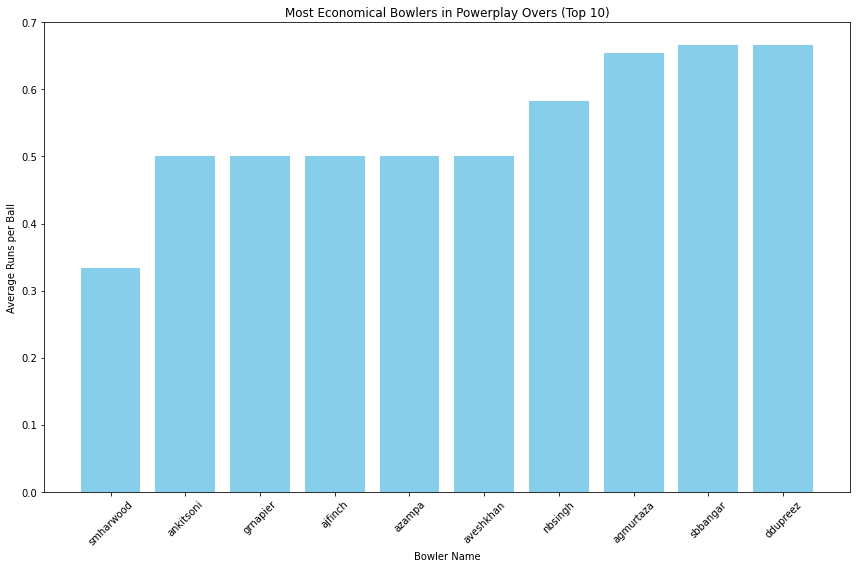

In [0]:
import matplotlib.pyplot as plt

# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
     

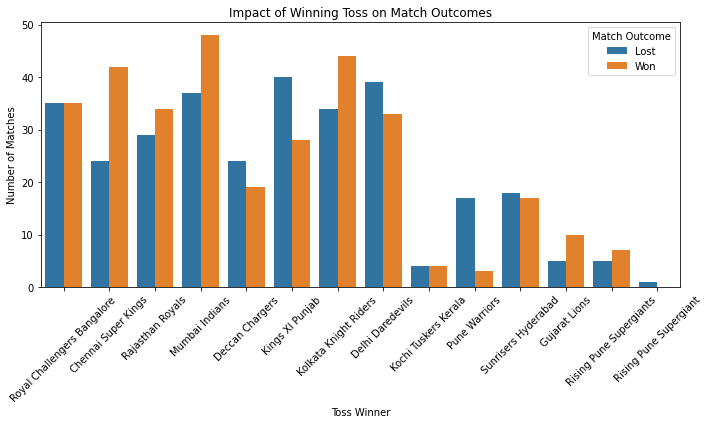

In [0]:

import seaborn as sns
toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


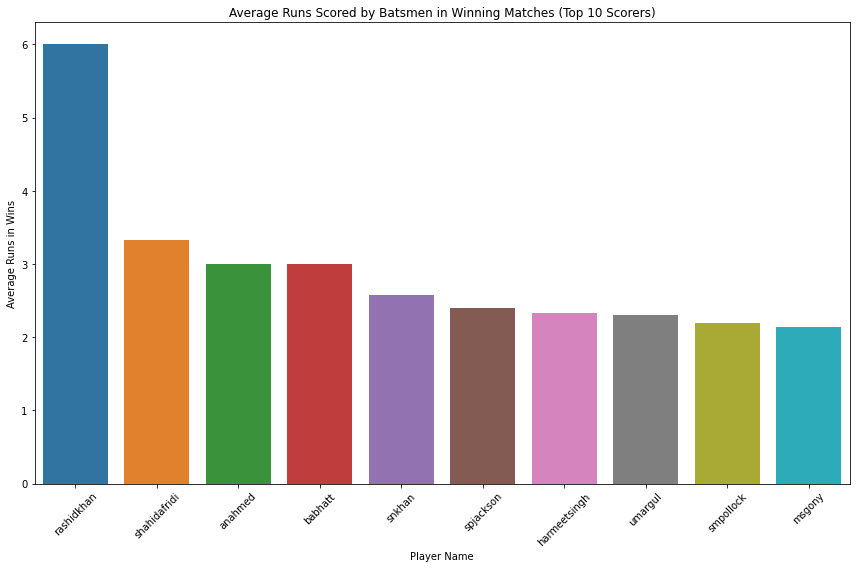

In [0]:
average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")

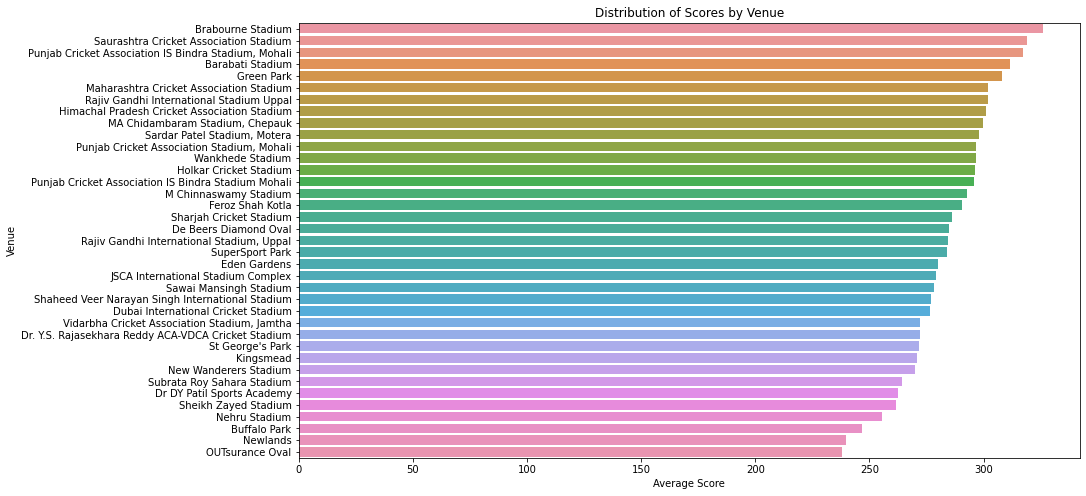

In [0]:
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()